In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_trainset.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_testset.csv')
combine = [train_df, test_df]
combine

[     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
 0              1         0       3  ...   7.2500   NaN         S
 1              2         1       1  ...  71.2833   C85         C
 2              3         1       3  ...   7.9250   NaN         S
 3              4         1       1  ...  53.1000  C123         S
 4              5         0       3  ...   8.0500   NaN         S
 ..           ...       ...     ...  ...      ...   ...       ...
 886          887         0       2  ...  13.0000   NaN         S
 887          888         1       1  ...  30.0000   B42         S
 888          889         0       3  ...  23.4500   NaN         S
 889          890         1       1  ...  30.0000  C148         C
 890          891         0       3  ...   7.7500   NaN         Q
 
 [891 rows x 12 columns],      PassengerId  Pclass  ... Cabin Embarked
 0            892       3  ...   NaN        Q
 1            893       3  ...   NaN        S
 2            894       2  ...   NaN       

In [4]:
print(train_df.columns.values)
print (test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']



<b>Categorical:</b> Survived, Sex, and Embarked. Ordinal: Pclass.

Which features are numerical?

<b>Continous:</b> Age, Fare. <b>Discrete:</b> SibSp, Parch.

In [5]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Which features are mixed data types?

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
Which features may contain errors or typos?

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Which features contain blank, null or empty values?

These will require correcting.

Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
Cabin > Age are incomplete in case of test dataset.
What are the data types for various features?

Helping us during converting goal.

Seven features are integer or floats. Six in case of test dataset.
Five features are strings (object).

In [7]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moubarek, Master. Gerios",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

<b>Correlating.</b>

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

<b>Completing.</b>

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

<b>Correcting.</b>

Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
PassengerId may be dropped from training dataset as it does not contribute to survival.
Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

<b>Creating.</b>

We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
We may want to engineer the Name feature to extract Title as a new feature.
We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
We may also want to create a Fare range feature if it helps our analysis.

<b>Classifying.</b>

We may also add to our assumptions based on the problem description noted earlier.

Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch',ascending=True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [14]:
combine[0].shape, combine[1].shape

((891, 12), (418, 11))

In [15]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [16]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_df['Title'] = labelencoder.fit_transform(train_df.Title.values)
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.575000
1,1,0.702703
2,2,0.156673
3,3,0.793651
4,4,0.347826


In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test_df['Title'] = labelencoder.fit_transform(test_df.Title.values)


In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2


In [21]:
train_df['Title'].value_counts()

2    517
1    185
3    126
0     40
4     23
Name: Title, dtype: int64

In [22]:
print(combine[0].head())

   PassengerId  Survived  Pclass  ...     Fare Embarked  Title
0            1         0       3  ...   7.2500        S      2
1            2         1       1  ...  71.2833        C      3
2            3         1       3  ...   7.9250        S      1
3            4         1       1  ...  53.1000        S      3
4            5         0       3  ...   8.0500        S      2

[5 rows x 11 columns]


In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [24]:
train_df.shape
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,2


In [25]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)

print(train_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      2
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      1
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      2


In [26]:
print (test_df.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0          892       3    0  34.5      0      0   7.8292        Q      2
1          893       3    1  47.0      1      0   7.0000        S      3
2          894       2    0  62.0      0      0   9.6875        Q      2
3          895       3    0  27.0      0      0   8.6625        S      2
4          896       3    1  22.0      1      1  12.2875        S      3


Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

A simple way is to generate random numbers between mean and standard deviation.

More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


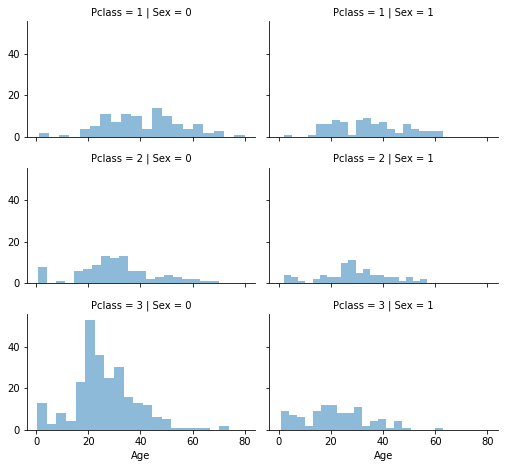

In [27]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [28]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [29]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,2
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,1
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,2


In [30]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [31]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,2,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,1,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,2,"(32.0, 48.0]"


In [32]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,2
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,2
3,895,3,0,1,0,0,8.6625,S,2
4,896,3,1,1,1,1,12.2875,S,3


In [33]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,2
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,1
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,2


In [34]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,2
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,2
3,895,3,0,1,0,0,8.6625,S,2
4,896,3,1,1,1,1,12.2875,S,3


Create new feature combining existing features
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [35]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [36]:
train_df.head()
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int64  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Title       891 non-null    int64  
 9   FamilySize  891 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 69.7+ KB


In [38]:
train_df['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

We can create another feature called IsAlone.

In [39]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [40]:
train_df.head()
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [41]:
dropped_one = train_df['Parch']
dropped_two = train_df['SibSp']
dropped_three = train_df['FamilySize']
dropped_one

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [42]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,7.8292,Q,2,1,1
1,893,3,1,2,1,0,7.0000,S,3,2,0
2,894,2,0,3,0,0,9.6875,Q,2,1,1
3,895,3,0,1,0,0,8.6625,S,2,1,1
4,896,3,1,1,1,1,12.2875,S,3,3,0


In [43]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,2,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,1,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,2,1


We can also create an artificial feature combining Pclass and Age.

In [44]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [45]:
train_df['Age*Class'].value_counts()

3      382
2      196
0      100
6       87
1       59
4       47
9        9
71       2
65       2
222      1
210      1
195      1
140      1
132      1
80       1
70       1
Name: Age*Class, dtype: int64

Completing a categorical feature¶
Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [46]:
freq_port = train_df['Embarked'].dropna().mode()[0]
freq_port

'S'

In [47]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Converting categorical feature to numeric
We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [48]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,2,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,1,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,2,1,6


In [49]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [50]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,2,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,1,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,2,1,6
5,0,3,0,1,1,2,2,1,3
6,0,1,0,3,3,0,2,1,3
7,0,3,0,0,2,0,0,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [51]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,2,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,2,1,6
3,895,3,0,1,1,0,2,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,2,1,0
6,898,3,1,1,0,2,1,1,3
7,899,2,0,1,2,0,2,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,2,0,3


In [52]:
copy_df=train_df.copy()
copyTest_df=test_df.copy()

In [53]:
from sklearn.preprocessing import OneHotEncoder
train_Embarked = copy_df["Embarked"].values.reshape(-1,1)
test_Embarked = copyTest_df["Embarked"].values.reshape(-1,1)

In [54]:
onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(train_Embarked)
test_OneHotEncoded = onehot_encoder.fit_transform(test_Embarked)

In [55]:
copy_df["EmbarkedS"] = train_OneHotEncoded[:,0]
copy_df["EmbarkedC"] = train_OneHotEncoded[:,1]
copy_df["EmbarkedQ"] = train_OneHotEncoded[:,2]
copyTest_df["EmbarkedS"] = test_OneHotEncoded[:,0]
copyTest_df["EmbarkedC"] = test_OneHotEncoded[:,1]
copyTest_df["EmbarkedQ"] = test_OneHotEncoded[:,2]

In [56]:
copy_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,0,3,0,1,0,0,2,0,3,1.0,0.0,0.0
1,1,1,1,2,3,1,3,0,2,0.0,1.0,0.0
2,1,3,1,1,1,0,1,1,3,1.0,0.0,0.0
3,1,1,1,2,3,0,3,0,2,1.0,0.0,0.0
4,0,3,0,2,1,0,2,1,6,1.0,0.0,0.0


In [57]:
copyTest_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,892,3,0,2,0,2,2,1,6,0.0,0.0,1.0
1,893,3,1,2,0,0,3,0,6,1.0,0.0,0.0
2,894,2,0,3,1,2,2,1,6,0.0,0.0,1.0
3,895,3,0,1,1,0,2,1,3,1.0,0.0,0.0
4,896,3,1,1,1,0,3,0,3,1.0,0.0,0.0


In [58]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,2,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,1,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,2,1,6


In [59]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,2,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,2,1,6
3,895,3,0,1,1,0,2,1,3
4,896,3,1,1,1,0,3,0,3


<b> Model, predict and solve </b>
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine

In [60]:
X_trainTest = copy_df.drop(copy_df.columns[[0,5]],axis=1)
Y_trainTest = copy_df["Survived"]
X_testTest = copyTest_df.drop(copyTest_df.columns[[0,5]],axis=1)
X_trainTest.head()

,Pclass,Sex,Age,Fare,Title,IsAlone,Age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,3,0,1,0,2,0,3,1.0,0.0,0.0
1,1,1,2,3,3,0,2,0.0,1.0,0.0
2,3,1,1,1,1,1,3,1.0,0.0,0.0
3,1,1,2,3,3,0,2,1.0,0.0,0.0
4,3,0,2,1,2,1,6,1.0,0.0,0.0


In [61]:
X_testTest.head()

,Pclass,Sex,Age,Fare,Title,IsAlone,Age*Class,EmbarkedS,EmbarkedC,EmbarkedQ
0,3,0,2,0,2,1,6,0.0,0.0,1.0
1,3,1,2,0,3,0,6,1.0,0.0,0.0
2,2,0,3,1,2,1,6,0.0,0.0,1.0
3,3,0,1,1,2,1,3,1.0,0.0,0.0
4,3,1,1,1,3,0,3,1.0,0.0,0.0


In [62]:
logReg = LogisticRegression()
logReg.fit(X_trainTest,Y_trainTest)
acc = logReg.score(X_trainTest,Y_trainTest)
acc

0.7912457912457912

In [63]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,2,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,1,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,2,1,6


In [64]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,2,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,2,1,6
3,3,0,1,1,0,2,1,3
4,3,1,1,1,0,3,0,3


Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

Note the confidence score generated by the model based on our training dataset.

In [65]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.69

In [66]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.473227
4,Embarked,0.253013
2,Age,0.226971
3,Fare,-0.056782
6,IsAlone,-0.101802
5,Title,-0.208505
7,Age*Class,-0.247848
0,Pclass,-0.832088


We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
Inversely as Pclass increases, probability of Survived=1 decreases the most.
This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
So is Title as second highest positive correlation.

In [67]:
svcTest = SVC()
svcTest.fit(X_trainTest, Y_trainTest)
acc_svcTest = svcTest.score(X_trainTest, Y_trainTest)
acc_svcTest

0.7643097643097643

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.


In [68]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

76.54

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.


In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.62

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.

The model generated confidence score is the lowest among the models evaluated so far.

In [70]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

71.04

In [71]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [72]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.46

In [73]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

37.6

In [74]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [75]:
random_forestTest = RandomForestClassifier(n_estimators=100)
random_forestTest.fit(X_trainTest, Y_trainTest)
Y_predTest = random_forestTest.predict(X_testTest)
acc_random_forestTest = round(random_forestTest.score(X_trainTest, Y_trainTest) * 100, 2)
acc_random_forestTest

86.76

In [76]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.62
2,Logistic Regression,79.69
7,Linear SVC,79.46
5,Perceptron,78.34
0,Support Vector Machines,76.54
4,Naive Bayes,71.04
6,Stochastic Gradient Decent,37.60


In [78]:
result = pd.DataFrame({
        "PassengerId": copyTest_df["PassengerId"],
        "Survived": Y_predTest
    })
result.shape

(418, 2)